In [30]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

## Code snippet:
### 1- opens the csv file
### 2- gets the required data from the given column name by connecting to the API
### 3- creates a barplot for "Summe pro Zeiteinheit"
### 4- creates a barplot for "Durchschnitt pro Zeiteinheit"

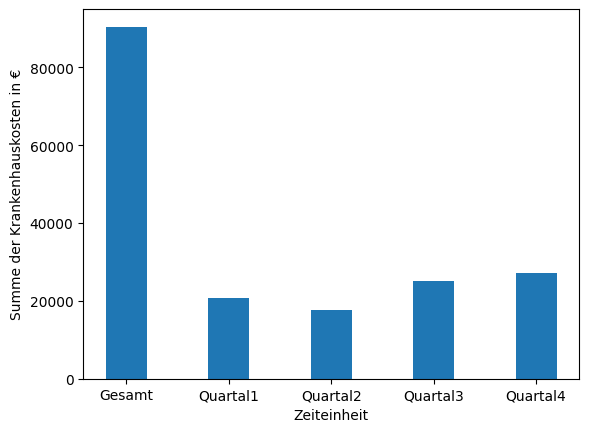

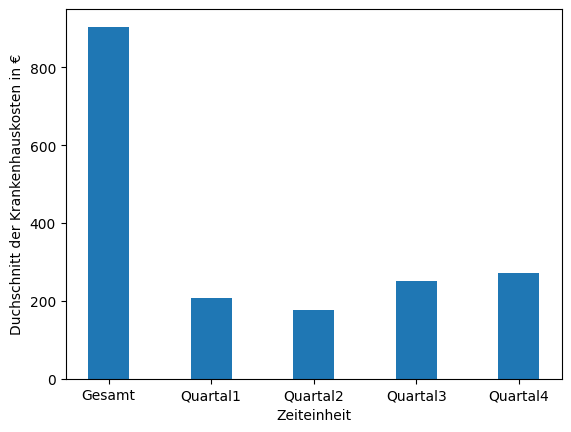

In [31]:
# URL for your API endpoint 
base_url = 'http://127.0.0.1:5000'

# Specify the column name and separator for the /stats/ endpoint
column_name = 'Krankenhauskosten'
separator = ';'

# Read the CSV file into a DataFrame (Replace 'test.csv' with your actual CSV file)
file_path = 'test.csv'
files = {'file': open(file_path, 'rb')}

# Send the POST request to the /stats/ endpoint
response = requests.post(f'{base_url}/stats/{column_name}/{separator}/', files=files)

# Check the response status code
if response.status_code == 200:
    # If the request was successful, parse the JSON response
    data = response.json()
    
    # turn the response dict to df
    df = pd.DataFrame.from_dict(data)
    
    # reindex the df 
    df.reset_index(inplace=True)
    
    # plot 1: a barplot that shows the Summe [given column] pro Zeiteinheit
    plt.bar(df["index"], df["Summe pro Zeiteinheit"], width = 0.4 )
    plt.xlabel("Zeiteinheit")
    plt.ylabel(f"Summe der {column_name} in €")
    plt.show()
    
    # plot 2: a barplot that shows the durchschnitt [given column] pro Zeiteinheit
    plt.bar(df["index"], df["Durchschnitt pro Zeiteinheit"], width = 0.4 )
    plt.xlabel("Zeiteinheit")
    plt.ylabel(f"Duchschnitt der {column_name} in €")
    plt.show()
    
else:
    # If there was an error, print the error message
    print(response.json())